<a href="https://colab.research.google.com/github/isra9731/projects/blob/main/Color_Identification_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Color Identification in Images**

Implement an image color detector which identiﬁes all the colors in an image

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2            #To use OpenCV we use cv2
from collections import Counter   #To extract count we use Counter from Collections library
from sklearn.cluster import KMeans        #To extract colors from images using KMeans
from skimage.color import rgb2lab, deltaE_cie76  #To compare colors we first convert them to lab using rgb2 then calculate similarities using deltaE_cie76
import os    #to combine paths while reading files from a directory

%matplotlib inline

Reading the Image

In [2]:
image= cv2.imread('/content/forest-web.webp')
image

array([[[ 0, 36, 16],
        [ 0, 36, 16],
        [ 0, 36, 16],
        ...,
        [44, 80, 76],
        [48, 86, 82],
        [38, 75, 71]],

       [[ 0, 39, 18],
        [ 0, 39, 18],
        [ 0, 39, 18],
        ...,
        [22, 60, 56],
        [34, 75, 70],
        [51, 91, 87]],

       [[11, 60, 38],
        [11, 60, 38],
        [13, 59, 38],
        ...,
        [30, 70, 66],
        [31, 74, 69],
        [25, 69, 64]],

       ...,

       [[16, 56, 40],
        [14, 53, 38],
        [12, 51, 36],
        ...,
        [13, 72, 44],
        [14, 73, 45],
        [10, 70, 42]],

       [[21, 60, 45],
        [15, 55, 39],
        [12, 51, 36],
        ...,
        [11, 78, 49],
        [ 7, 73, 44],
        [ 3, 70, 41]],

       [[35, 74, 59],
        [31, 71, 55],
        [19, 58, 43],
        ...,
        [ 0, 71, 41],
        [ 0, 66, 36],
        [ 0, 64, 34]]], dtype=uint8)

Type of The Image

In [3]:
print("The type of the image is {}".format(type(image)))

The type of the image is <class 'numpy.ndarray'>


Shape of The Image

In [4]:
print("shape {}".format(image.shape)) 

shape (800, 1200, 3)


The shape says that the first 2 values are the pixel values and the last value is set to 3 as each pixel is combination of 3 colors Red, Green, Blue

Displaying the Image

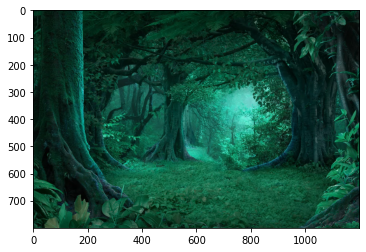

In [5]:
plt.imshow(image)

As we know by default OpenCV reads image in BGR(blue, green, red) sequence. To view the actual image we need to convert the rendering into RGB(red, green, blue)

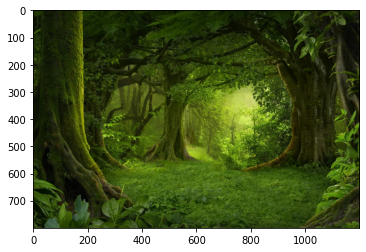

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    #cvtColor converts the rendering from BGR to RGB
plt.imshow(image)

We can also convert the image to grey filter

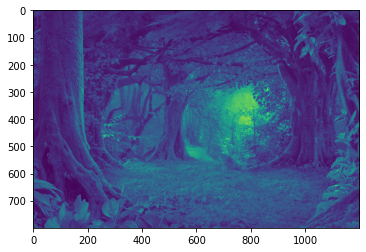

In [7]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    #cvtColor converts the rendering from BGR to RGB
plt.imshow(grey_image)

Resizing the image to the given dimensions

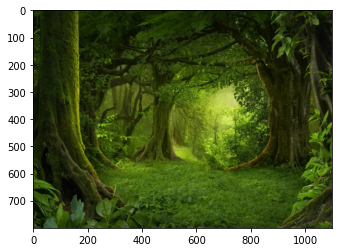

In [8]:
resize_image = cv2.resize(image,(1100,800))
plt.imshow(resize_image)

#**Color Identification**

Conversion of RGB to HEX for using as labels on Pie chart

In [9]:
def RGB2HEX(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))

{:02x} displays the hex value for the respective color

Reading image in RGB color space 

In [10]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

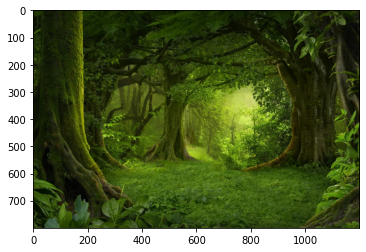

In [11]:
image = get_image("/content/forest-web.webp")
plt.imshow(image)

From this we get the actual image

We are defining a function get_colors to extract top colors from image and display them as pie

In [12]:
def get_colors(image, number_of_colors, show_chart):
#resizing the image to reduce the pixel size and reduces the time to extract the color from image
  modified_image = cv2.resize(image, (1000, 800), interpolation = cv2.INTER_AREA)
# KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.  
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

#forming clusters of colors and these clusters will be our top colors.
  clf = KMeans(n_clusters = number_of_colors)
# We then fit and predict on the same image to extract the prediction into the variable labels.
  labels = clf.fit_predict(modified_image)

#Counter to get count of all labels.
  counts = Counter(labels)

# To find the colors, we use clf.cluster_centers_
  center_colors = clf.cluster_centers_
# The ordered_colors iterates over the keys present in count, and then divides each value by 255
  ordered_colors = [center_colors[i]/255 for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
  rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
#if show_chart is true we plot a pie chart with count.values() and labels as hex colors and colors as ordered_colors  
  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
  return rgb_colors

Our pie chart with top 8 colors of image

[array([16.23032764, 23.12936971,  3.47694711]),
 array([135.17179172, 162.68142681,  40.44633046]),
 array([44.46400547, 59.99568011, 11.13585099]),
 array([ 97.85720579, 124.68337929,  32.63606402]),
 array([183.05023147, 205.38886202,  78.56629586]),
 array([59.13021498, 80.66961438, 15.9583041 ]),
 array([30.18256446, 40.49812722,  6.91031784]),
 array([ 76.23155394, 101.48263872,  23.85062117])]

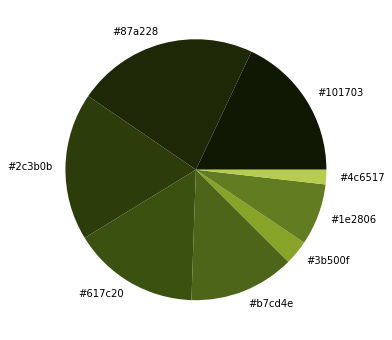

In [13]:
get_colors(get_image('/content/forest-web.webp'), 8, True)

**Search images using colors**

Filtering set of five images based on the color


In [14]:
IMAGE_DIRECTORY = '/content/drive/MyDrive/images'
COLORS = {
    'GREEN': [0, 128, 0],            #defining colors as dictionary of colors
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0]
}
images = []               #reading all the images from that folder and save their values in image array

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

Showing all the images in folder using For loop

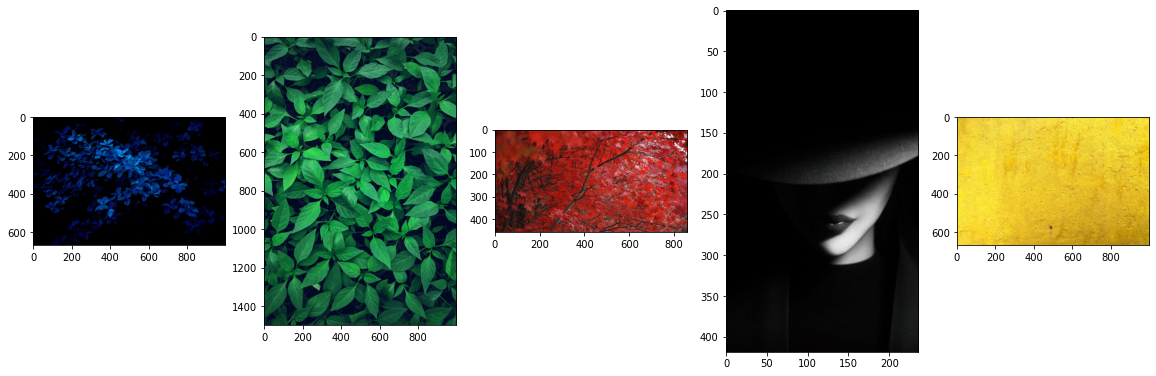

In [15]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])

From the above output we are splitting the area into subplots equal to the number of images. Takeing the arguments as number of rows = 1, number of columns = all images which is 5 in our case and the index.

Matching images with 10 colors by defining a function : match_image_by_color which filters all images that match the selected color.

In [16]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
 # extracting the image colors using previous defined method get_colors in RGB format  
    image_colors = get_colors(image, number_of_colors, False)
 #rgb2lab method converts the selected color to a format we can compare.      
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
#The for loop iterates over all the colors retrieved from the image.
    select_image = False
    for i in range(number_of_colors):
# for each color the loop changes to its lab
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
#if difference between  the selected colors and color in itr is less than that threshold, we declare it as a match.
        if (diff < threshold):
            select_image = True
    
    return select_image

Showing selected images with the help of show_selected_images function which iterates over all images

In [17]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

Searching for GREEN color

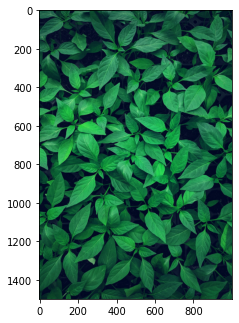

In [18]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

Searching for RED color

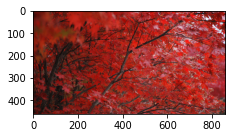

In [19]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

Searching for BLUE color

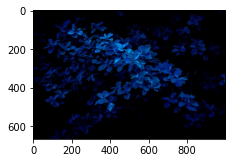

In [20]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

Searching for BLACK color

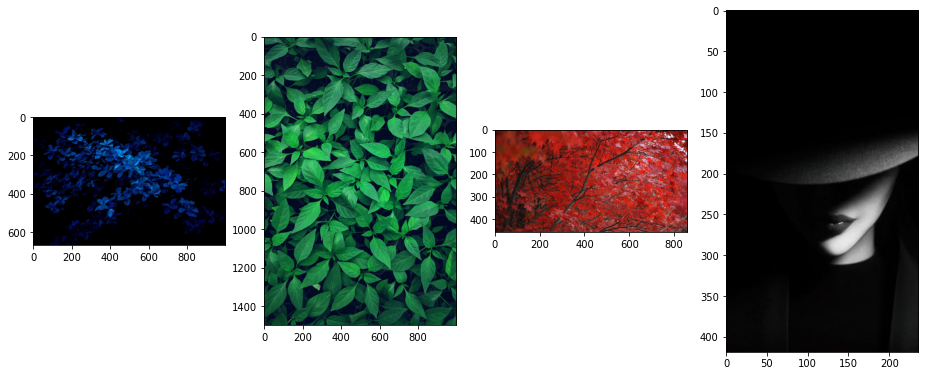

In [21]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLACK'], 60, 5)

Searching for YELLOW color

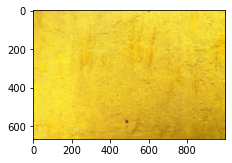

In [22]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

By this we extract colors from an image using KMeans algorithm and then use this to search images based on colors.